# Регрессионный анализ данных методами машинного обучения

## 1. Цель работы, выходная переменная и признаки

Цель работы: Проанализировать данные о CO2-выбросах автомобилей и построить модели машинного обучения для предсказания уровня CO2-эмиссий на основе характеристик vehicles. Это поможет понять факторы, влияющие на эмиссии, и предсказывать их для новых автомобилей.

Выходная (целевая) переменная: CO2 Emissions(g/km) - уровень эмиссий CO2 в граммах на километр.

Признаки для машинного обучения:
- Make (производитель)
- Model (модель)
- Vehicle Class (класс автомобиля)
- Engine Size(L) (объем двигателя)
- Cylinders (количество цилиндров)
- Transmission (тип трансмиссии)
- Fuel Type (тип топлива)
- Fuel Consumption City (L/100 km) (расход в городе)
- Fuel Consumption Hwy (L/100 km) (расход на шоссе)
- Fuel Consumption Comb (L/100 km) (комбинированный расход)
- Fuel Consumption Comb (mpg) (комбинированный расход в mpg)

Мы будем использовать числовые и категориальные признаки после предобработки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

## 2. Предварительная обработка данных

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


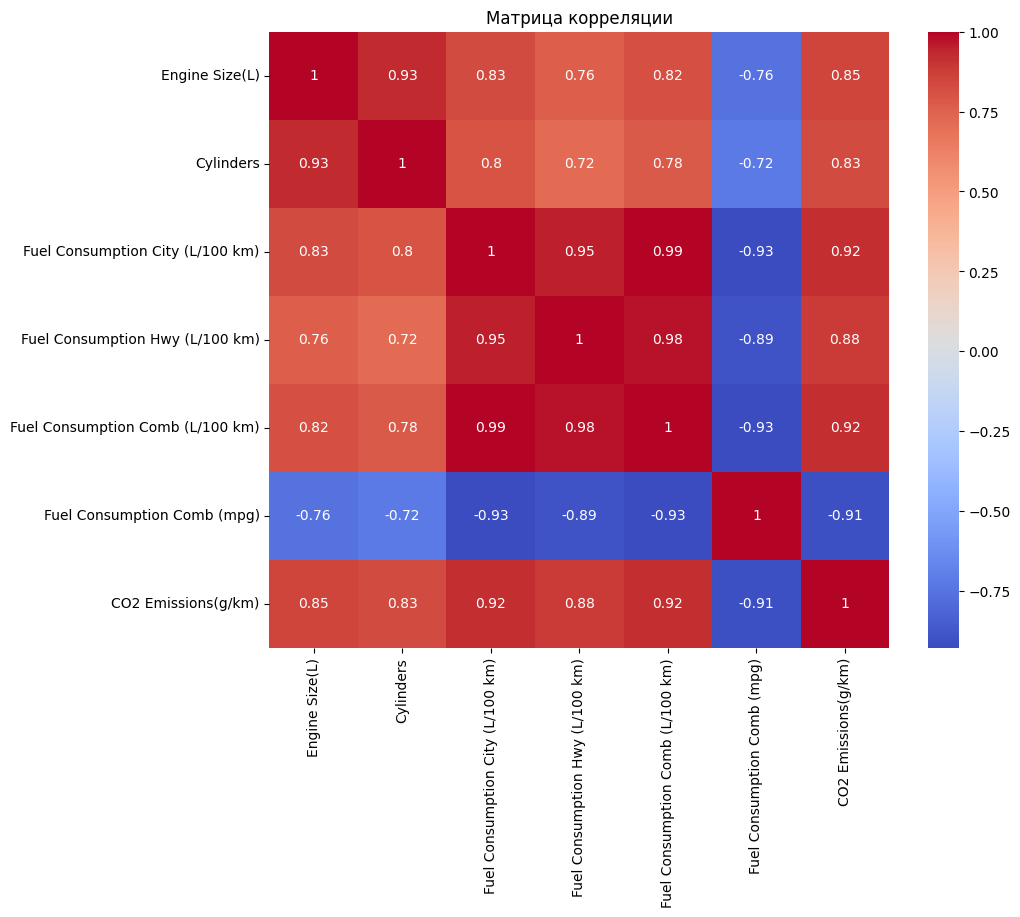

In [3]:
# Загрузка данных (предполагаем, что файл доступен)
df = pd.read_csv('../datasets/CO2_Emissions_Canada.csv')

# Проверка пропущенных значений
print(df.isnull().sum())

# Заполнение пропущенных значений средним (если есть)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Кодирование категориальных переменных
cat_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
encoder = OneHotEncoder(handle_unknown='ignore')

# Подготовка признаков и целевой переменной
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

# Преобразование категориальных колонок
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols.drop('CO2 Emissions(g/km)')),
        ('cat', encoder, cat_cols)
    ])

# Применение предобработки
X_processed = preprocessor.fit_transform(X)

# Матрица корреляции (только для числовых признаков оригинального датасета)
num_df = df[num_cols]
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

## 3. Разделение на обучающую и тестовую выборки

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## 4. Создание моделей

In [5]:
# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Полиномиальная регрессия (степень 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Ridge регрессия
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


## 5. Вычисление прогнозных значений

In [6]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_ridge = ridge_reg.predict(X_test)

## 6. Графики регрессии и прогнозные значения

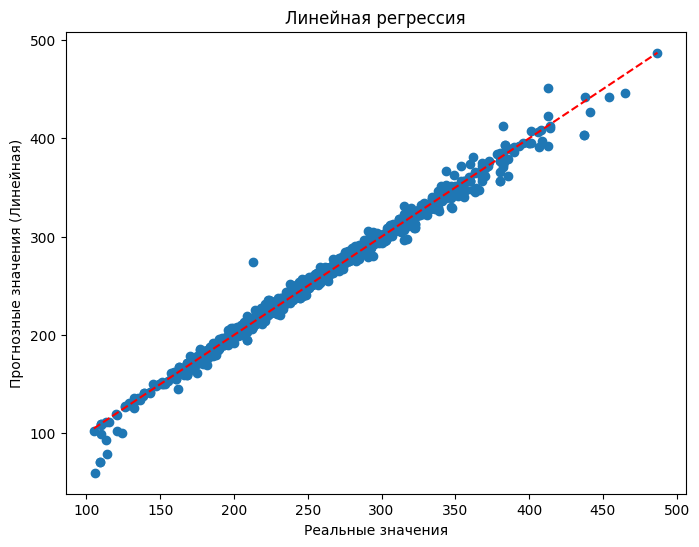

Уравнение линейной регрессии: y = 167.57 + sum(coef * x_i)


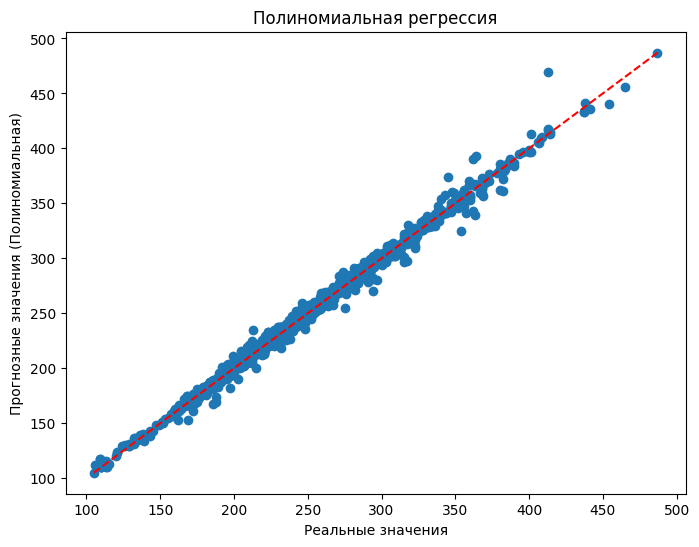

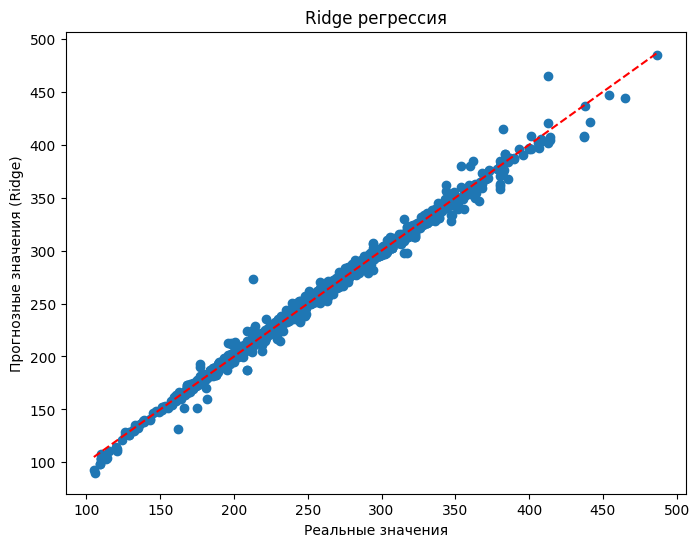

In [7]:
# График для линейной регрессии
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения (Линейная)')
plt.title('Линейная регрессия')
plt.show()

# Уравнение линейной регрессии (пример для основных коэффициентов, но из-за one-hot это сложно; упрощаем)
print(f'Уравнение линейной регрессии: y = {lin_reg.intercept_:.2f} + sum(coef * x_i)')

# Аналогично для других моделей (графики)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения (Полиномиальная)')
plt.title('Полиномиальная регрессия')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения (Ridge)')
plt.title('Ridge регрессия')
plt.show()

## 7. Оценка точности моделей

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f'{model_name} - R2: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')

evaluate_model(y_test, y_pred_lin, 'Линейная регрессия')
evaluate_model(y_test, y_pred_poly, 'Полиномиальная регрессия')
evaluate_model(y_test, y_pred_ridge, 'Ridge регрессия')

Линейная регрессия - R2: 0.9913, RMSE: 5.4612, MAE: 3.2396, MSE: 29.8245
Полиномиальная регрессия - R2: 0.9939, RMSE: 4.5804, MAE: 2.7473, MSE: 20.9798
Ridge регрессия - R2: 0.9926, RMSE: 5.0484, MAE: 3.0125, MSE: 25.4866


## 8. Новый датасет с ожидаемыми и прогнозными значениями

In [ ]:
results_df = pd.DataFrame({
    'Real_Value': y_test,
    'Pred_Linear': y_pred_lin,
    'Pred_Poly': y_pred_poly,
    'Pred_Ridge': y_pred_ridge
})

results_df.to_csv('prediction_results.csv', index=False)
print('Новый датасет сохранен как prediction_results.csv')